In [1]:
from visualizer import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Load the benchmark result files
df_128 = pd.read_csv("test_results_v1/128.csv")
df_256 = pd.read_csv("test_results_v1/256.csv")
df_512 = pd.read_csv("test_results_v1/512.csv")

# Add dimension column to differentiate datasets
df_128["dimension"] = 128
df_256["dimension"] = 256
df_512["dimension"] = 512

# Merge all datasets into a single DataFrame
df_all = pd.concat([df_128, df_256, df_512], ignore_index=True)

# Extract dataset size and indexing type from the table_name column
df_all["dataset_size"] = df_all["table_name"].apply(lambda x: "500K" if "500K" in x else "1M" if "1M" in x else "5M")
df_all["indexing_type"] = df_all["table_name"].apply(lambda x: "No Index" if "no_index" in x else ("IVFFlat" if "ivfflat" in x else "HNSW"))

# Convert dataset_size to numeric for proper ordering
df_all["dataset_size"] = df_all["dataset_size"].map({"500K": 500000, "1M": 1000000, "5M": 5000000})

# Calculate throughput manually to ensure correctness
df_all["calculated_throughput"] = df_all["num_queries"] / df_all["elapsed_time"]

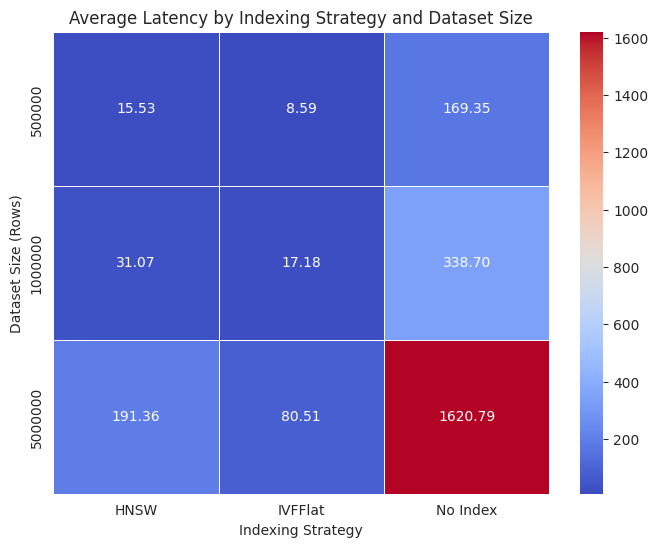

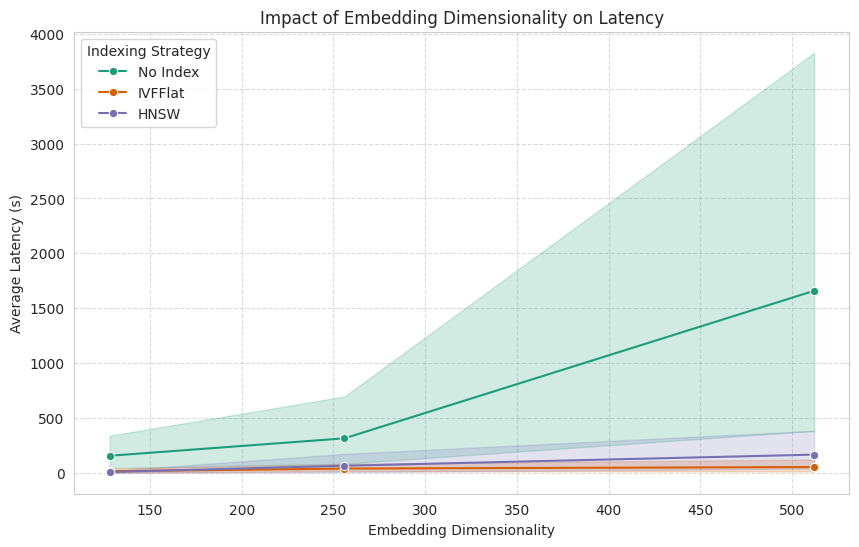

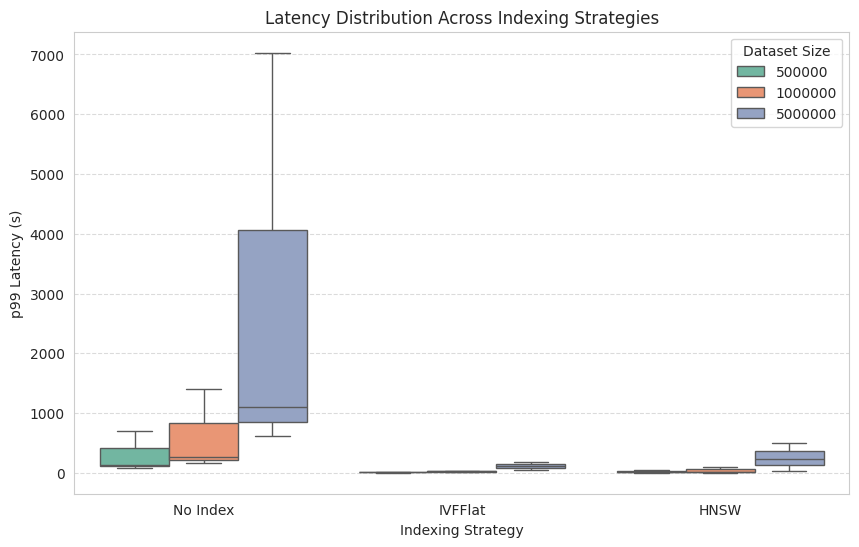

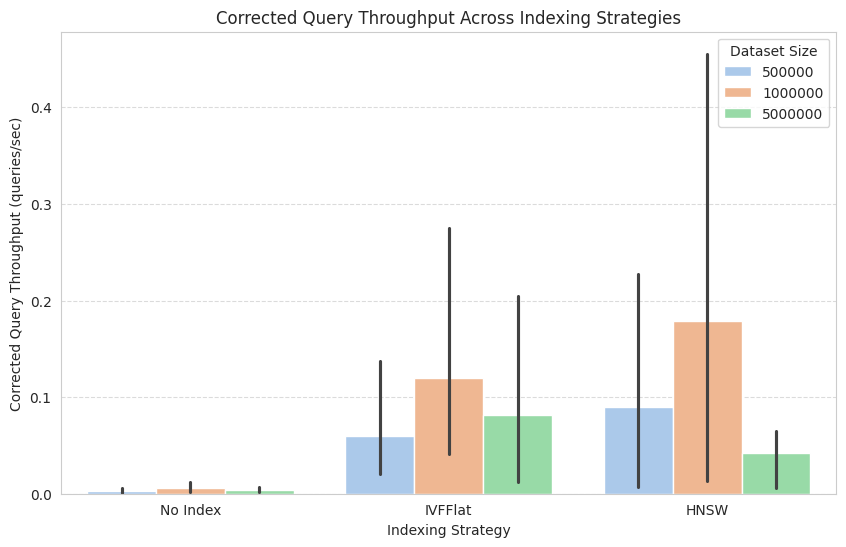

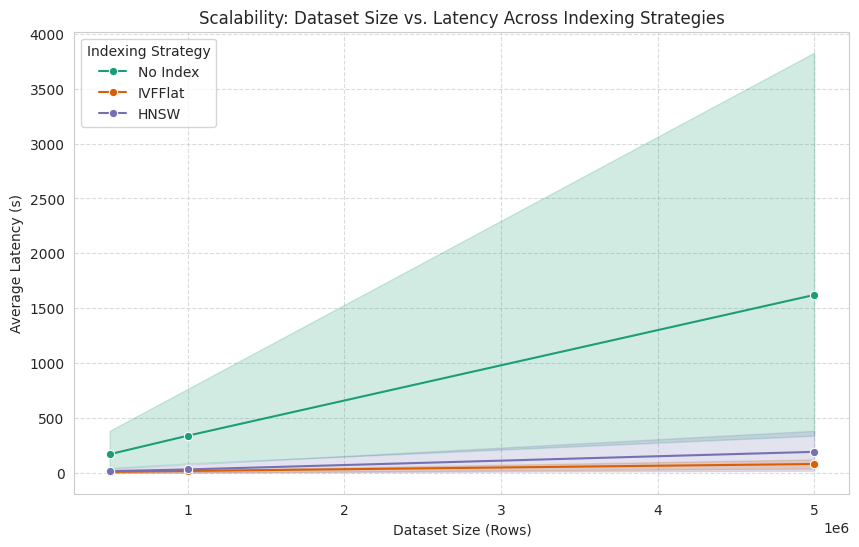

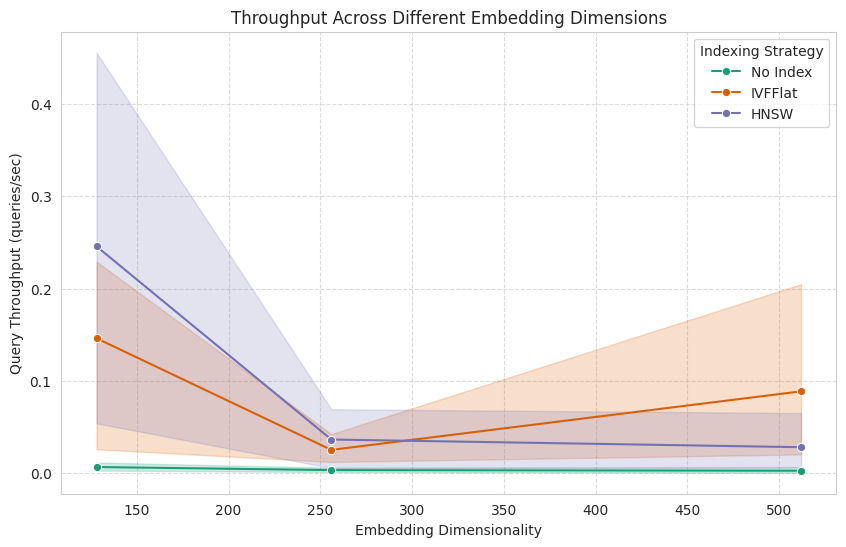

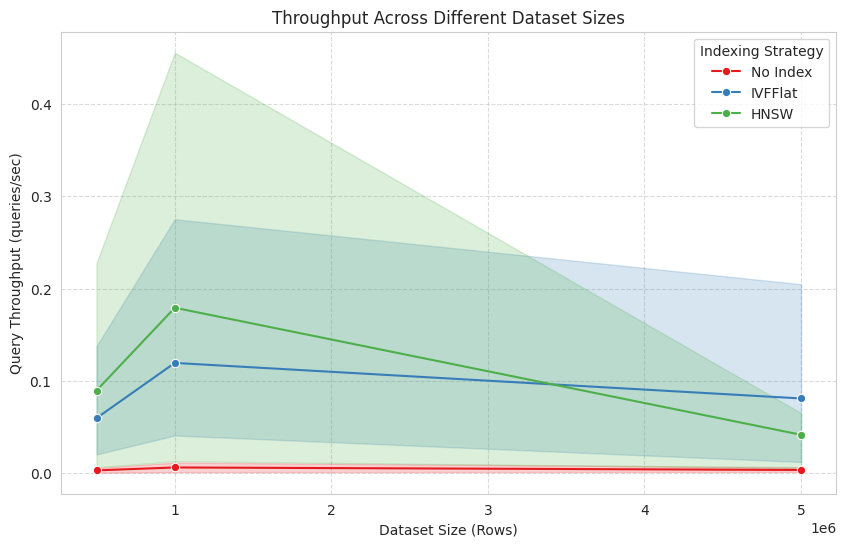

In [3]:
plot_latency_heatmap(df_all)
plot_latency_vs_dimension(df_all)
plot_latency_distribution(df_all)
plot_throughput_vs_indexing(df_all)
plot_scalability(df_all)
plot_throughput_vs_dimension(df_all)
plot_throughput_vs_dataset_size(df_all)